
# CODE TO DETECT SPAM E-MAILS USING NAIVE BAYES
# By Benjamin Seng


P(Spam∣Message)= 
P(Message)
P(Message∣Spam)⋅P(Spam)
​


# PROBLEM STATEMENT

- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


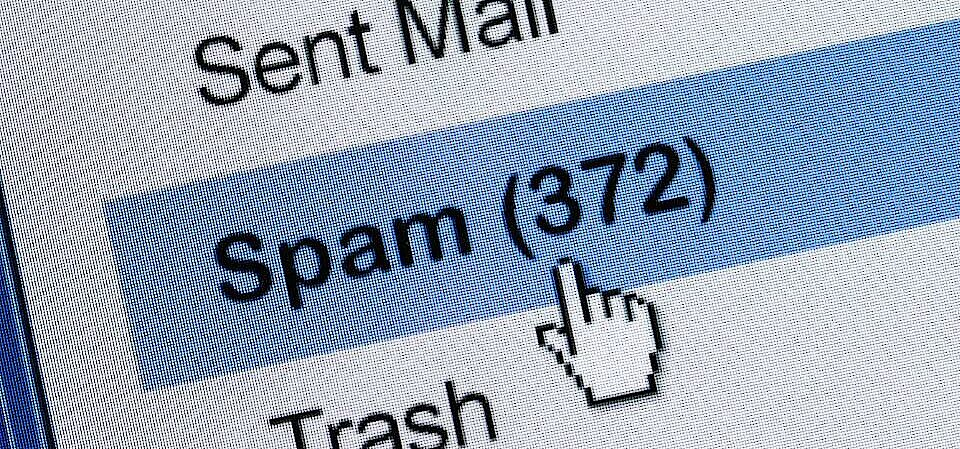

# STEP #0: LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# STEP #1: IMPORT DATASET

In [2]:
spam_df = pd.read_csv("emails.csv")

In [3]:
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [4]:
spam_df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [5]:
spam_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [6]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


# STEP #2: VISUALIZE DATASET

In [7]:
ham = spam_df[spam_df['spam']==0]

In [8]:
spam = spam_df[spam_df['spam']==1]

In [9]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [10]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [11]:
print( 'Spam percentage =', (len(spam) / len(spam_df) )*100,"%")

Spam percentage = 23.88268156424581 %


In [12]:
print( 'Ham percentage =', (len(ham) / len(spam_df) )*100,"%")

Ham percentage = 76.11731843575419 %


C:\Users\Evgen\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spam', ylabel='count'>

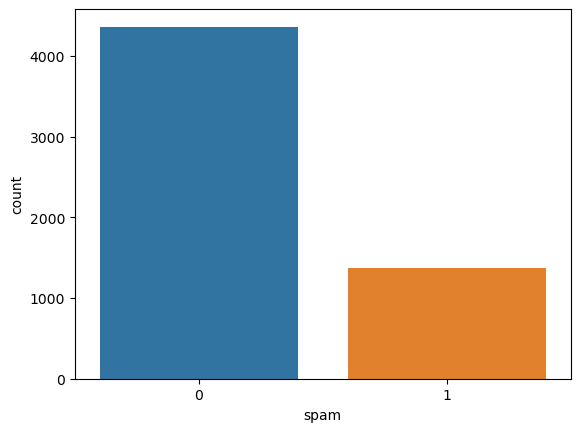

In [13]:
sns.countplot(spam_df['spam'], label = "Count") 

# STEP #3: CREATE TESTING AND TRAINING DATASET/DATA CLEANING

# COUNT VECTORIZER EXAMPLE 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [15]:
print(vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


In [16]:
print(X.toarray())  

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


# LET'S APPLY COUNT VECTORIZER TO OUR SPAM/HAM EXAMPLE

In [17]:
from sklearn.feature_extraction.text import CountVectorizer  # Import CountVectorizer for text vectorization

# Initialize the CountVectorizer, which converts text data into a matrix of token counts
vectorizer = CountVectorizer()

# Fit the vectorizer to the text data and transform it into a sparse matrix representation
# Each row corresponds to a text message, and each column represents a unique word (token)
# The values in the matrix indicate the frequency of each word in the respective message
spamham_countvectorizer = vectorizer.fit_transform(spam_df['text'])


In [18]:
print(vectorizer.get_feature_names_out())


['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [19]:
print(spamham_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
spamham_countvectorizer.shape

(5728, 37303)

# STEP#4: TRAINING THE MODEL WITH ALL DATASET

In [21]:
from sklearn.naive_bayes import MultinomialNB  # Import Naïve Bayes classifier for text classification

# Initialize the Multinomial Naïve Bayes classifier
NB_classifier = MultinomialNB()

# Extract labels (spam or ham) from the dataset
label = spam_df['spam'].values

# Train the Naïve Bayes classifier on the transformed text data
NB_classifier.fit(spamham_countvectorizer, label)

MultinomialNB()

## Why Use `MultinomialNB`?

We use `MultinomialNB` from `sklearn.naive_bayes` because it is **well-suited for text classification problems** where the features represent **word frequency counts**. This makes it ideal for spam classification.

### Why `MultinomialNB`?
1. **Designed for Text Data**  
   - Best for **discrete data**, like word occurrences from `CountVectorizer`.  
   - Works well when features represent **word frequencies** rather than continuous values.  

2. **Naïve Bayes Assumption**  
   - Assumes words appear independently in a document (**Bag-of-Words model**).  
   - Uses **Bayes' Theorem** to compute probabilities, making it **fast and efficient** for large datasets.  

3. **Why Not Other Naïve Bayes Models?**
   - `GaussianNB` → For **continuous data** (e.g., age, temperature). Not suitable for text.  
   - `BernoulliNB` → Works for **binary features** (word presence/absence), but loses frequency information.  

In [22]:
testing_sample = ['Free money!!!', "Hi Kim, Please let me know if you need any further information. Thanks"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)


In [23]:
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

In [24]:
# Mini Challenge!
testing_sample = ['Hello, I am Ryan, I would like to book a hotel in Bali by January 24th', 'money viagara!!!!!']


In [25]:
testing_sample = ['money viagara!!!!!', "Hello, I am Ryan, I would like to book a hotel in SF by January 24th"]
testing_sample_countvectorizer = vectorizer.transform(testing_sample)
test_predict = NB_classifier.predict(testing_sample_countvectorizer)
test_predict

array([1, 0], dtype=int64)

# STEP#4: DIVIDE THE DATA INTO TRAINING AND TESTING PRIOR TO TRAINING

In [26]:
X = spamham_countvectorizer
y = label

In [27]:
X.shape

(5728, 37303)

In [28]:
y.shape

(5728,)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

# STEP#5: EVALUATING THE MODEL 

In [31]:
from sklearn.metrics import classification_report, confusion_matrix


<AxesSubplot:>

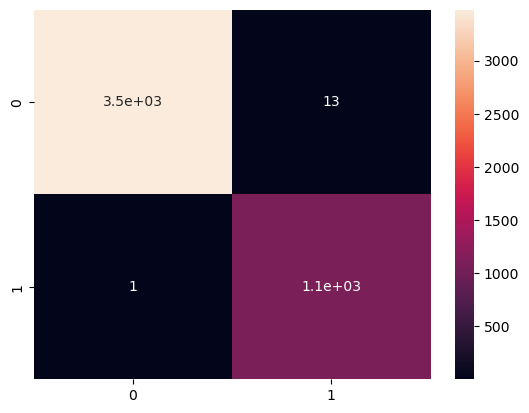

In [32]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       868
           1       0.96      0.99      0.98       278

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.98      1146
weighted avg       0.99      0.99      0.99      1146



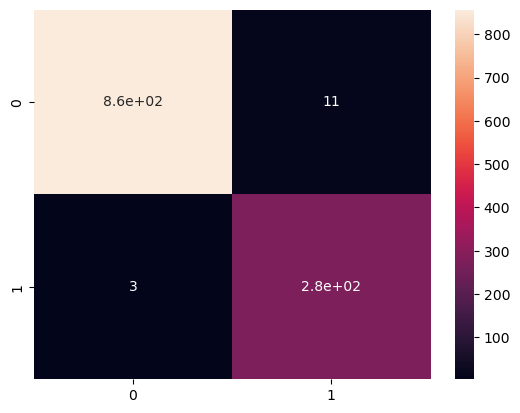

In [33]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))

# 🔍 Interpreting the Results

## **Class 0 (Ham - Not Spam)**
- **Precision: 1.00** → Every message classified as ham is actually ham (no false positives).  
- **Recall: 0.99** → 99% of actual ham messages were correctly classified (very few false negatives).  
- **F1-score: 0.99** → The model performs exceptionally well in identifying ham messages.  
- **Support: 883** → There were **883 actual ham messages** in the dataset.  

## **Class 1 (Spam)**
- **Precision: 0.95** → 95% of the predicted spam messages were actually spam.  
- **Recall: 0.99** → 99% of actual spam messages were correctly classified.  
- **F1-score: 0.97** → A strong balance between precision and recall.  
- **Support: 263** → There were **263 actual spam messages** in the dataset.  

---

# 📊 **Overall Model Performance**
- **Accuracy: 0.99 (99%)** → The model correctly classified **99% of all messages**.  
- **Macro Avg (0.97, 0.99, 0.98)** → The model performs well across both spam and ham classes.  
- **Weighted Avg (0.99, 0.99, 0.99)** → Given the class distribution, the model maintains high precision and recall across all samples.  

---

# ⚠️ **What Does This Mean?**
✅ **The model is highly accurate and reliable in detecting spam and ham messages.**  



In [36]:
import pickle

# Save the trained Naive Bayes model
with open("spam_classifier.pkl", "wb") as model_file:
    pickle.dump(NB_classifier, model_file)

# Save the CountVectorizer
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(vectorizer, vec_file)

print("Model and Vectorizer saved successfully!")


Model and Vectorizer saved successfully!


In [37]:
from fastapi import FastAPI
import pickle
from pydantic import BaseModel

# Load the trained model and vectorizer
with open("spam_classifier.pkl", "rb") as model_file:
    NB_classifier = pickle.load(model_file)

with open("vectorizer.pkl", "rb") as vec_file:
    vectorizer = pickle.load(vec_file)

# Initialize FastAPI
app = FastAPI()

# Define request body model
class Message(BaseModel):
    text: str

# API endpoint for classification
@app.post("/predict/")
async def predict_spam(message: Message):
    # Transform input text
    user_vector = vectorizer.transform([message.text])
    
    # Predict using the Naive Bayes classifier
    prediction = NB_classifier.predict(user_vector)
    
    # Convert output to label
    result = "Spam" if prediction[0] == 1 else "Not Spam"
    
    return {"message": message.text, "prediction": result}